In [ ]:
# Install dependencies
%pip install segment-geospatial leafmap localtileserver

import os
import leafmap
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load your own TIFF image
image = '/content/drive/MyDrive/Colab Notebooks/data/leafmapsection.tif'

# Initialize SAM class
checkpoint = '/content/drive/MyDrive/Colab Notebooks/data/sam_vit_h_4b8939.pth'

sam = SamGeo(
    model_type="vit_h",
    checkpoint=checkpoint,
    sam_kwargs=None,
)

In [ ]:
# import rasterio

# # Load the leafmapsection.tif file and print its metadata
# with rasterio.open('/content/drive/MyDrive/Colab Notebooks/data/leafmapsection.tif') as src1:
#     print(src1.meta)

# # Load the normalized_training_image_1996_0.tif file and print its metadata
# with rasterio.open('/content/drive/MyDrive/Colab Notebooks/data/normalized_training_image_1996_0.tif') as src2:
#     print(src2.meta)

# # Compare the metadata of the two files and look for differences in the following attributes:
# # - count: number of bands
# # - width, height: shape of the image
# # - crs: coordinate reference system
# # - transform: affine transformation matrix


In [ ]:
from skimage import exposure
import rasterio
import numpy as np

# Read the original file
with rasterio.open('/content/drive/MyDrive/Colab Notebooks/data/normalized_training_image_1996_0.tif') as src:
    img_data = src.read()
    meta = src.meta

# Convert data type to uint8 using skimage
img_data_uint8 = exposure.rescale_intensity(img_data, out_range=(0, 255)).astype(np.uint8)

# Update the metadata with the new data type
meta.update(dtype='uint8')

# Save the converted image
with rasterio.open('/content/drive/MyDrive/Colab Notebooks/data/converted_normalized_training_image_1996_0.tif', 'w', **meta) as dst:
    dst.write(img_data_uint8)


In [ ]:
# Automatic mask generation
image = '/content/drive/MyDrive/Colab Notebooks/data/leafmapsection.tif'
sam.generate(image, output="masks.tif", foreground=True, unique=True)

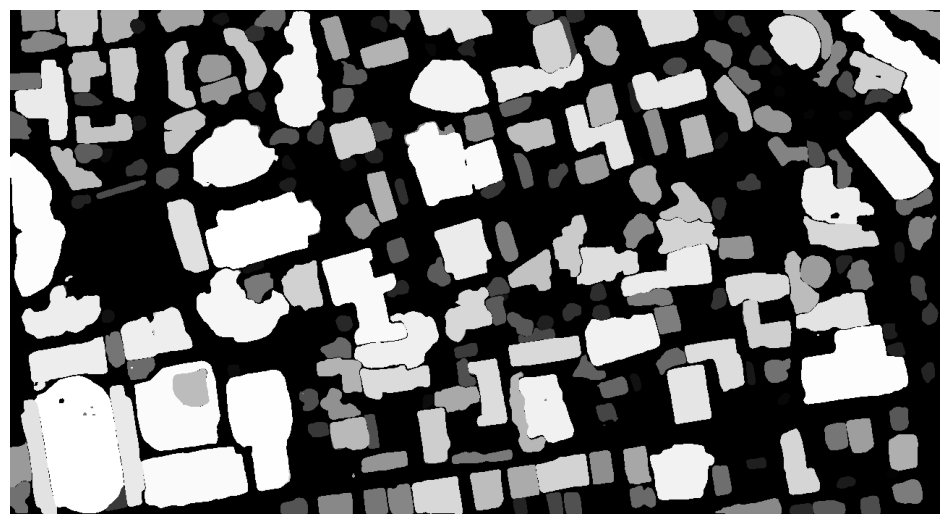

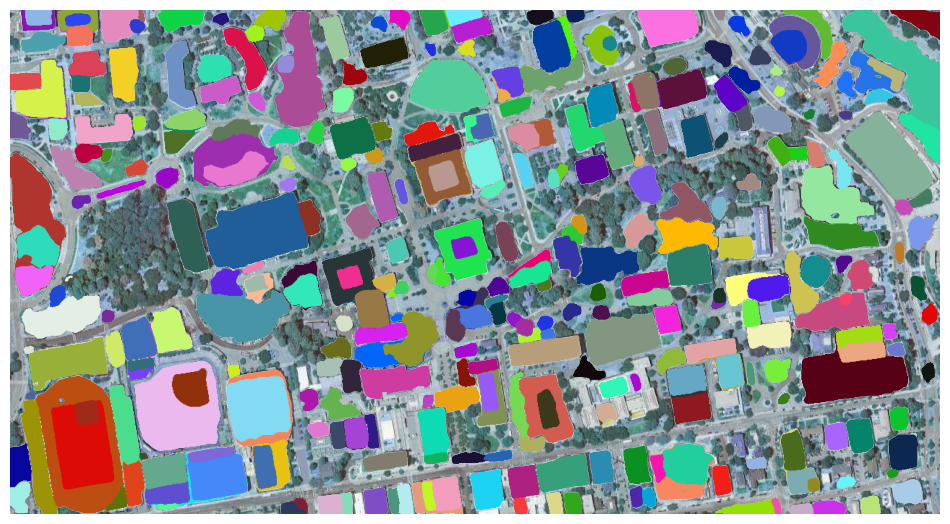

In [ ]:
# Visualize the results
sam.show_masks(cmap="binary_r")
sam.show_anns(axis="off", alpha=1, output="annotations.tif")


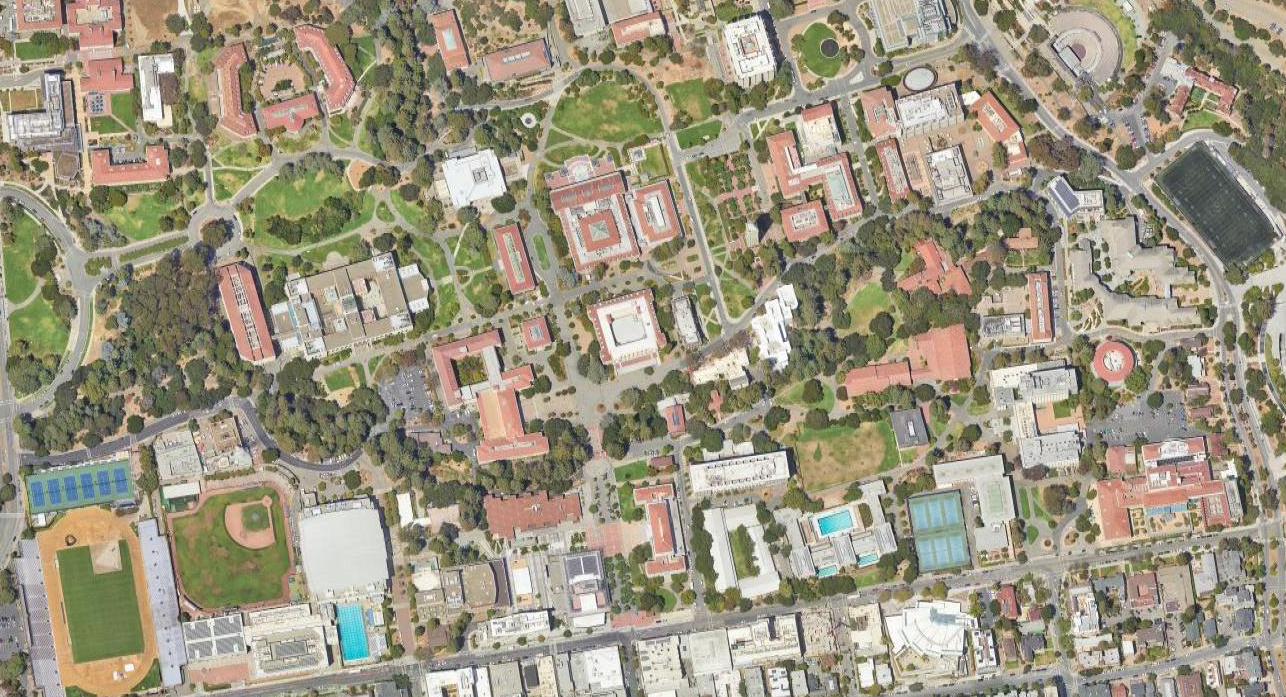
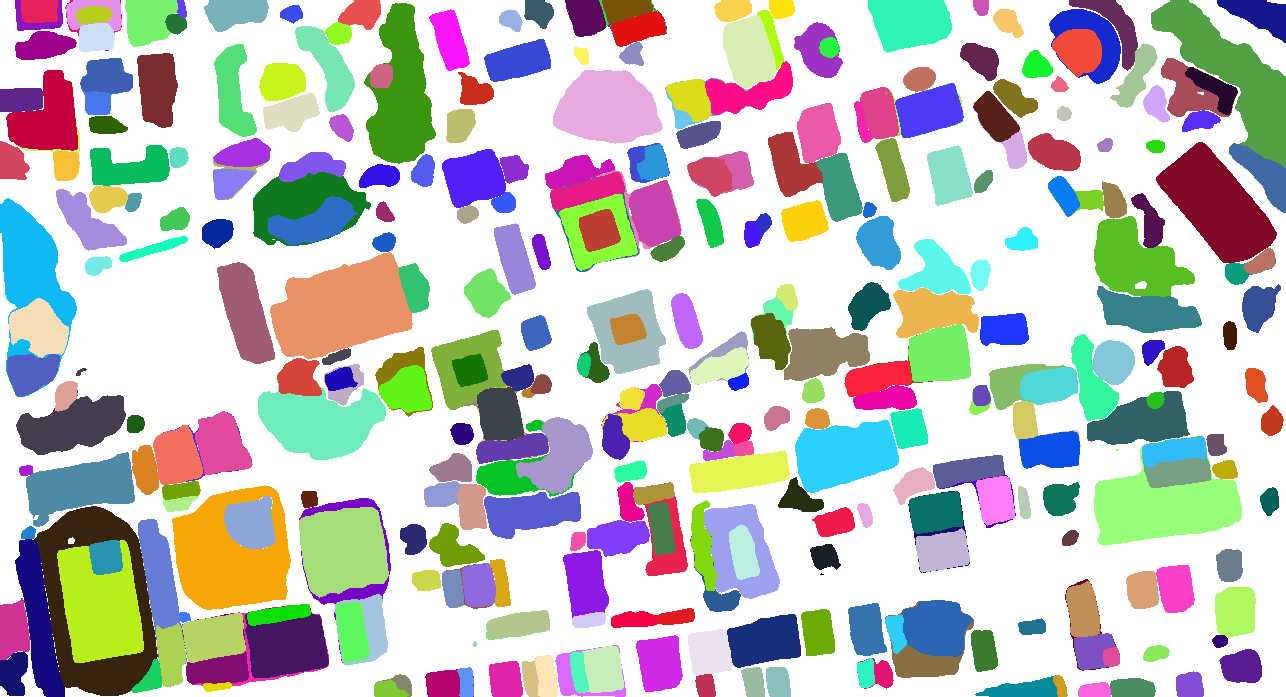

In [ ]:
# Compare images with a slider
leafmap.image_comparison(
    image,
    "annotations.tif",
    label1="Original Image",
    label2="Image Segmentation",
)